<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment07/assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for a binary classification with a regularization - 20145822 김영현
---

# Training Code
___

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

# data input
data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data07/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

# function definition
# calculate f_k value
def func_k_calc(x, y, x_exp, y_exp):
  return (x ** x_exp) * (y ** y_exp)
# calculate g function value
def func_calc(theta_list, x, y):
  func_val = 0
  for i in range(10):
    for j in range(10):
      func_val += theta_list[i][j] * func_k_calc(x, y, i, j)
  return func_val
# calculate z values
def z_calc(theta_list, pointX, pointY):
  z = []
  for i in range(len(pointX)):
    z_iteration = func_calc(theta_list, pointX[i], pointY[i])
    z.append(z_iteration)
  return z
# calculate sigmoid values
def calc_sigmoid(z):
  sigmoid = []
  for i in range(len(z)):
    sigmoid.append(1/(1+math.exp(-z[i])))
  return sigmoid
# calculate objective function value
def ob_func(label, sigmoid, reg_param, theta_list):
  sum_left = 0
  for i in range(len(label)):
    oprd_left = (-1*label[i]) * math.log(sigmoid[i])
    oprd_right = (1-label[i]) * math.log(1-sigmoid[i])
    sum_left += oprd_left - oprd_right
  sum_left = sum_left/len(label)
  sum_right = 0
  for i in range(10):
    for j in range(10):
      sum_right += theta_list[i][j] ** 2
  sum_right = sum_right * reg_param / 2

  return sum_left + sum_right
# calculate next theta value
def theta_desc(theta_list, alpha, pointX, pointY, label, sigmoid, reg_param):
  sum = np.zeros((10,10))
  for k in range(len(sigmoid)):
    for i in range(10):
      for j in range(10):
        sum[i][j] += (sigmoid[k] - label[k]) * func_k_calc(pointX[k], pointY[k], i, j)
  for i in range(10):
      for j in range(10):
        sum[i][j] = alpha * (sum[i][j] / len(sigmoid) + reg_param * theta_list[i][j])
        theta_list[i][j] = theta_list[i][j] - sum[i][j]
  return theta_list

# variable declaration
# array for store each regularization's theta
theta_list_over = np.ones((10,10))
theta_list_just = np.ones((10,10))
theta_list_under = np.ones((10,10))
# regularization control parameter [over, just, under]
reg_params = [0.001, 0.01, 0.1]
# learning rate
alpha = 0.01
# iteration counter
iteration = 0
# list for store data at every iteration
ob_func_list = []
accuracy_list = []

# start iteration
while True:
  # calculate each value for this iteration
  z_list_over = z_calc(theta_list_over, pointX, pointY)
  z_list_just = z_calc(theta_list_under, pointX, pointY)
  z_list_under =  z_calc(theta_list_just, pointX, pointY)
  z_list = [z_list_over, z_list_just, z_list_under]
  theta_list = [theta_list_over, theta_list_just, theta_list_under]
  sigmoid_list = []
  for i in range(3):
    sigmoid_list.append(calc_sigmoid(z_list[i])) 
  ob_func_val = []
  for i in range(3):
    ob_func_val.append(ob_func(label, sigmoid_list[i], reg_params[i], theta_list[i]))
  # store predictions
  predictions = []
  for i in range(3):
    predictions_temp = []
    for j in z_list[i]:
      if j < 0:
        predictions_temp.append(0)
      else:
        predictions_temp.append(1)
    predictions.append(predictions_temp)
  # calculate accuracy
  acc_temp = [0, 0, 0]
  for i in range(3):
    acc_hit = 0
    for j in range(len(label)):
      if label[j] == predictions[i][j]:
        acc_hit += 1
    acc_temp[i] = (acc_hit/len(label) * 100)
  accuracy_list.append(acc_temp)
  # store each value
  ob_func_list.append(ob_func_val)
  # escape rule
  if iteration > 0:
    if iteration % 1000 == 0:
      print("iteration : ", iteration)
      print("training error : ", ob_func_list[-1])
      print("final accuracy : ", accuracy_list[-1])
    escape_hit = 0
    for i in range(3):
      if abs(ob_func_list[iteration][i] - ob_func_list[iteration-1][i]) < 0.000001:
        escape_hit += 1
    if escape_hit == 3:
      break
  # update next theta values & iteration value
  theta_list_over = theta_desc(theta_list_over, alpha, pointX, pointY, label, sigmoid_list[0], reg_params[0])
  theta_list_just = theta_desc(theta_list_just, alpha, pointX, pointY, label, sigmoid_list[1], reg_params[1])
  theta_list_under = theta_desc(theta_list_under, alpha, pointX, pointY, label, sigmoid_list[2], reg_params[2])
  iteration += 1

print("Training finished with")
print("iteration : ", iteration)
print("training error : ", ob_func_list[-1])
print("final accuracy : ", accuracy_list[-1])

iterations = [i for i in range(iteration+1)]

# Submission
___

## 1.  Plot the training data
___


No handles with labels found to put in legend.


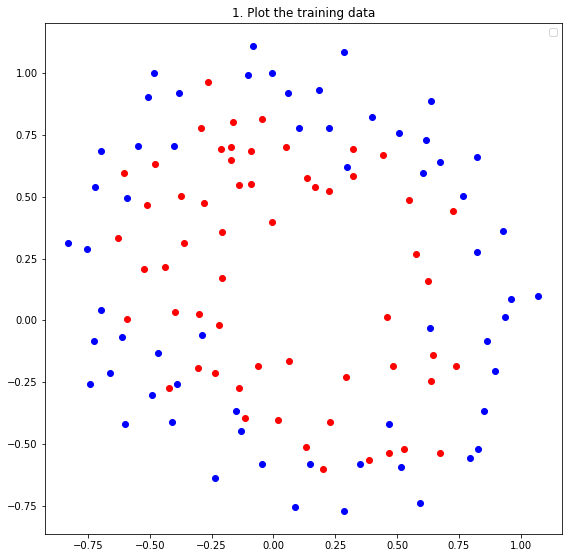

In [4]:
# 1. Plot the training data
plt.figure(figsize=(8,8))
plt.title("1. Plot the training data")
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()